In [1]:
import os
import torch
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt

from PIL import Image
from io import BytesIO
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score

/Users/hanjun/opt/anaconda3/envs/pt38/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import warnings
warnings.filterwarnings(action='ignore')

In [5]:
DATA_PREPROCESSED_PATH = '숙소유형 인코딩2.csv'
IMAGE_EMBEDDING_PATH_2 = '1117img_layer2_feature.csv'
IMAGE_EMBEDDING_PATH_2_3 = '1117img_layer2+3_feature.csv'
IMAGE_EMBEDDING_PATH_2_3_4 = '1117img_layer2+3+4_feature.csv'
IMAGE_EMBEDDING_PATH_2_4 = '1117img_layer2+4_feature.csv'
IMAGE_EMBEDDING_PATH_3 = '1117img_layer3_feature.csv'
IMAGE_EMBEDDING_PATH_3_4 = '1117img_layer3_4_feature.csv'
IMAGE_EMBEDDING_PATH_4 = '1117img_layer4_feature.csv'

In [11]:
# 전체 전처리 데이터
df_data_preprocessed = pd.read_csv(DATA_PREPROCESSED_PATH, index_col=0)
df_data_preprocessed

이미지주소  \
이미지 인덱스                                                            
jeju_1         https://a0.muscache.com/im/pictures/85dfb906-4...   
jeju_2         https://a0.muscache.com/im/pictures/miso/Hosti...   
jeju_3         https://a0.muscache.com/im/pictures/60e684d8-b...   
jeju_4         https://a0.muscache.com/im/pictures/miso/Hosti...   
jeju_5         https://a0.muscache.com/im/pictures/miso/Hosti...   
...                                                          ...   
gyeongbuk_294  https://a0.muscache.com/im/pictures/0f9e01c7-b...   
gyeongbuk_295  https://a0.muscache.com/im/pictures/ba9b911e-c...   
gyeongbuk_297  https://a0.muscache.com/im/pictures/918a2203-0...   
gyeongbuk_298  https://a0.muscache.com/im/pictures/2c79d403-0...   
gyeongbuk_299  https://a0.muscache.com/im/pictures/b7e183f2-a...   

                                      숙소이름  \
이미지 인덱스                                      
jeju_1                      애월읍, 제주시의 전원주택   
jeju_2                      애월읍, 제주시의 전원주택   
jeju_3          Hallim-eub, Cheju의 게스트용 별채   
jeju_4                       애월읍, 제주시의 캠핑카   
jeju_5         Hangyeong-myeon, Cheju의 개인실   
...                                    ...   
gyeongbuk_294                    영덕군의 돔하우스   
gyeongbuk_295     Jung-dong, Suseong-gu의 집   
gyeongbuk_297  Maepo-eup, Danyang-gun의 아파트   
gyeongbuk_298                      의성군의 펜션   
gyeongbuk_299   Gangdong-dong, Buk-gu의 아파트   

                                                            한줄소개  \
이미지 인덱스                                                            
jeju_1                                                    7번방의선물   
jeju_2            <애월, 단독> 2층-오션뷰 ♡잔디밭 100평. 야외스파. 화장실3. 복층 전원주택   
jeju_3         '어떤제주'를 상상하며 여행 오시나요? 잊지 못할 추억을 '어떤제주'에서 만들어 보세요.   
jeju_4                                              비치보이스, Boy25   
jeju_5         mukda_101/제주서쪽 "판포" _바다 앞 오션뷰_ 하와 카페&펍에서 음료&칵테...   
...                                                          ...   
gyeongbuk_294                        동해바다가 내려다 보이는 감성충만한 돔하우스 산장   
gyeongbuk_295       ☆☆신규오픈특가 ♡비밀의 정원 (모던한 스타일의 조용하고 아늑한 둘만의 공간~)   
gyeongbuk_297                            시가 생각나는 조용하고 멋진뷰를 가진 숙소   
gyeongbuk_298                                 의성서당 (한옥도서관, 북스테이)   
gyeongbuk_299                                 바다품은 독채형 숙소 "연하우스"   

                              리뷰평점 및 개수  \
이미지 인덱스                                   
jeju_1            평점 5.0점(5점 만점), 후기 8개   
jeju_2            평점 5.0점(5점 만점), 후기 5개   
jeju_3           평점 4.9점(5점 만점), 후기 39개   
jeju_4         평점 4.75점(5점 만점), 후기 110개   
jeju_5          평점 4.95점(5점 만점), 후기 60개   
...                                 ...   
gyeongbuk_294   평점 4.24점(5점 만점), 후기 58개   
gyeongbuk_295   평점 4.49점(5점 만점), 후기 45개   
gyeongbuk_297  평점 4.95점(5점 만점), 후기 133개   
gyeongbuk_298   평점 4.91점(5점 만점), 후기 56개   
gyeongbuk_299  평점 4.96점(5점 만점), 후기 111개   

                                                           숙소 링크 keyword  \
이미지 인덱스                                                                    
jeju_1         https://www.airbnb.co.kr/rooms/654748909105050...    전원주택   
jeju_2         https://www.airbnb.co.kr/rooms/609619956836759...    전원주택   
jeju_3         https://www.airbnb.co.kr/rooms/23033879?adults...      별채   
jeju_4         https://www.airbnb.co.kr/rooms/45731996?adults...     캠핑카   
jeju_5         https://www.airbnb.co.kr/rooms/52844863?adults...     개인실   
...                                                          ...     ...   
gyeongbuk_294  https://www.airbnb.co.kr/rooms/15271664?adults...    돔하우스   
gyeongbuk_295  https://www.airbnb.co.kr/rooms/52126866?adults...       집   
gyeongbuk_297  https://www.airbnb.co.kr/rooms/49005530?adults...     아파트   
gyeongbuk_298  https://www.airbnb.co.kr/rooms/42728755?adults...      펜션   
gyeongbuk_299  https://www.airbnb.co.kr/rooms/44420827?adults...     아파트   

                 평점  후기개수 keyword2  개인실  다인실  별채  아파트  캠핑  펜션 * 빌라  호텔 * 리조트  
이미지 인덱스                                                       

In [12]:
df_data_preprocessed.rename(
    columns={
        '이미지주소': 'image_url',
        '평점': 'rating',
        '후기개수': 'comment',
        '개인실': 'single',
        '다인실': 'multi',
        '별채': 'outhouse',
        '아파트': 'apartment',
        '캠핑': 'camping',
        '펜션 * 빌라': 'pension',
        '호텔 * 리조트': 'hotel',
    },
    inplace=True)
df_data_preprocessed.index = df_data_preprocessed.index.rename('image_index')
df_data_preprocessed

image_url  \
image_index                                                        
jeju_1         https://a0.muscache.com/im/pictures/85dfb906-4...   
jeju_2         https://a0.muscache.com/im/pictures/miso/Hosti...   
jeju_3         https://a0.muscache.com/im/pictures/60e684d8-b...   
jeju_4         https://a0.muscache.com/im/pictures/miso/Hosti...   
jeju_5         https://a0.muscache.com/im/pictures/miso/Hosti...   
...                                                          ...   
gyeongbuk_294  https://a0.muscache.com/im/pictures/0f9e01c7-b...   
gyeongbuk_295  https://a0.muscache.com/im/pictures/ba9b911e-c...   
gyeongbuk_297  https://a0.muscache.com/im/pictures/918a2203-0...   
gyeongbuk_298  https://a0.muscache.com/im/pictures/2c79d403-0...   
gyeongbuk_299  https://a0.muscache.com/im/pictures/b7e183f2-a...   

                                      숙소이름  \
image_index                                  
jeju_1                      애월읍, 제주시의 전원주택   
jeju_2                      애월읍, 제주시의 전원주택   
jeju_3          Hallim-eub, Cheju의 게스트용 별채   
jeju_4                       애월읍, 제주시의 캠핑카   
jeju_5         Hangyeong-myeon, Cheju의 개인실   
...                                    ...   
gyeongbuk_294                    영덕군의 돔하우스   
gyeongbuk_295     Jung-dong, Suseong-gu의 집   
gyeongbuk_297  Maepo-eup, Danyang-gun의 아파트   
gyeongbuk_298                      의성군의 펜션   
gyeongbuk_299   Gangdong-dong, Buk-gu의 아파트   

                                                            한줄소개  \
image_index                                                        
jeju_1                                                    7번방의선물   
jeju_2            <애월, 단독> 2층-오션뷰 ♡잔디밭 100평. 야외스파. 화장실3. 복층 전원주택   
jeju_3         '어떤제주'를 상상하며 여행 오시나요? 잊지 못할 추억을 '어떤제주'에서 만들어 보세요.   
jeju_4                                              비치보이스, Boy25   
jeju_5         mukda_101/제주서쪽 "판포" _바다 앞 오션뷰_ 하와 카페&펍에서 음료&칵테...   
...                                                          ...   
gyeongbuk_294                        동해바다가 내려다 보이는 감성충만한 돔하우스 산장   
gyeongbuk_295       ☆☆신규오픈특가 ♡비밀의 정원 (모던한 스타일의 조용하고 아늑한 둘만의 공간~)   
gyeongbuk_297                            시가 생각나는 조용하고 멋진뷰를 가진 숙소   
gyeongbuk_298                                 의성서당 (한옥도서관, 북스테이)   
gyeongbuk_299                                 바다품은 독채형 숙소 "연하우스"   

                              리뷰평점 및 개수  \
image_index                               
jeju_1            평점 5.0점(5점 만점), 후기 8개   
jeju_2            평점 5.0점(5점 만점), 후기 5개   
jeju_3           평점 4.9점(5점 만점), 후기 39개   
jeju_4         평점 4.75점(5점 만점), 후기 110개   
jeju_5          평점 4.95점(5점 만점), 후기 60개   
...                                 ...   
gyeongbuk_294   평점 4.24점(5점 만점), 후기 58개   
gyeongbuk_295   평점 4.49점(5점 만점), 후기 45개   
gyeongbuk_297  평점 4.95점(5점 만점), 후기 133개   
gyeongbuk_298   평점 4.91점(5점 만점), 후기 56개   
gyeongbuk_299  평점 4.96점(5점 만점), 후기 111개   

                                                           숙소 링크 keyword  \
image_index                                                                
jeju_1         https://www.airbnb.co.kr/rooms/654748909105050...    전원주택   
jeju_2         https://www.airbnb.co.kr/rooms/609619956836759...    전원주택   
jeju_3         https://www.airbnb.co.kr/rooms/23033879?adults...      별채   
jeju_4         https://www.airbnb.co.kr/rooms/45731996?adults...     캠핑카   
jeju_5         https://www.airbnb.co.kr/rooms/52844863?adults...     개인실   
...                                                          ...     ...   
gyeongbuk_294  https://www.airbnb.co.kr/rooms/15271664?adults...    돔하우스   
gyeongbuk_295  https://www.airbnb.co.kr/rooms/52126866?adults...       집   
gyeongbuk_297  https://www.airbnb.co.kr/rooms/49005530?adults...     아파트   
gyeongbuk_298  https://www.airbnb.co.kr/rooms/42728755?adults...      펜션   
gyeongbuk_299  https://www.airbnb.co.kr/rooms/44420827?adults...     아파트   

              rating  comment keyword2  single  multi  outhouse  apartment  \
image_index                                                

In [69]:
# 이미지 임베딩 데이터
df_image_embedding = pd.read_csv(IMAGE_EMBEDDING_PATH_2, index_col=0)
df_image_embedding

img_name      L2_0      L2_1      L2_2      L2_3      L2_4  \
0     gyeongnam_203.jpg  0.139648  0.169798  0.136722  0.108873  0.176598   
1     gyeongbuk_194.jpg  0.140625  0.193402  0.150842  0.108315  0.186995   
2     gyeongnam_217.jpg  0.141954  0.178325  0.142441  0.102194  0.190987   
3          jeju_102.jpg  0.151979  0.173062  0.145052  0.106857  0.177310   
4          jeju_116.jpg  0.132614  0.175584  0.139151  0.111856  0.175659   
...                 ...       ...       ...       ...       ...       ...   
1112  gyeongnam_232.jpg  0.135774  0.180139  0.146762  0.105828  0.186918   
1113  gyeongnam_226.jpg  0.130606  0.186938  0.146593  0.120030  0.192117   
1114       jeju_133.jpg  0.138077  0.169712  0.142581  0.103773  0.180805   
1115       jeju_127.jpg  0.142617  0.171123  0.140616  0.106747  0.173767   
1116  gyeongbuk_199.jpg  0.130180  0.186989  0.155539  0.121664  0.179350   

          L2_5      L2_6      L2_7      L2_8  ...    L2_118    L2_119  \
0     0.123397  0.120343  0.245084  0.149954  ...  0.153847  0.248158   
1     0.132722  0.113584  0.244671  0.152429  ...  0.168092  0.256605   
2     0.121189  0.114551  0.233060  0.150725  ...  0.160857  0.262379   
3     0.133428  0.102689  0.248616  0.144603  ...  0.156440  0.258038   
4     0.150412  0.101449  0.255162  0.157335  ...  0.151801  0.261162   
...        ...       ...       ...       ...  ...       ...       ...   
1112  0.125276  0.125666  0.242583  0.143527  ...  0.151955  0.251003   
1113  0.121673  0.114408  0.237203  0.151742  ...  0.167647  0.249439   
1114  0.136002  0.108735  0.218698  0.163893  ...  0.161860  0.248061   
1115  0.127077  0.097530  0.251893  0.140797  ...  0.151784  0.245972   
1116  0.132715  0.115970  0.228854  0.162364  ...  0.161893  0.245483   

        L2_120    L2_121    L2_122    L2_123    L2_124    L2_125    L2_126  \
0     0.193384  0.275223  0.169231  0.209414  0.087829  0.113126  0.305492   
1     0.200156  0.266320  0.179573  0.216465  0.100368  0.118192  0.322847   
2     0.190300  0.267404  0.180495  0.221187  0.086937  0.106955  0.321539   
3     0.212007  0.259628  0.177409  0.220439  0.091256  0.106826  0.306511   
4     0.204252  0.251961  0.183886  0.217760  0.112515  0.096464  0.333100   
...        ...       ...       ...       ...       ...       ...       ...   
1112  0.196565  0.254061  0.180761  0.224260  0.105139  0.118857  0.323966   
1113  0.202714  0.263786  0.189999  0.222651  0.114683  0.105625  0.323678   
1114  0.197883  0.275109  0.176760  0.212554  0.117851  0.101078  0.305961   
1115  0.198928  0.255099  0.174460  0.215780  0.104089  0.101218  0.304679   
1116  0.205678  0.257338  0.191760  0.213876  0.107926  0.110830  0.312408   

        L2_127  
0     0.151653  
1     0.149029  
2     0.152065  
3     0.142500  
4     0.142683  
...        ...  
1112  0.153585  
1113  0.161128  
1114  0.161473  
1115  0.142151  
1116  0.170806  

[1117 rows x 129 columns]

In [70]:
df_image_embedding.insert(0, 'image_index', df_image_embedding['img_name'].apply(lambda x: os.path.splitext(x)[0]))
df_image_embedding

image_index           img_name      L2_0      L2_1      L2_2  \
0     gyeongnam_203  gyeongnam_203.jpg  0.139648  0.169798  0.136722   
1     gyeongbuk_194  gyeongbuk_194.jpg  0.140625  0.193402  0.150842   
2     gyeongnam_217  gyeongnam_217.jpg  0.141954  0.178325  0.142441   
3          jeju_102       jeju_102.jpg  0.151979  0.173062  0.145052   
4          jeju_116       jeju_116.jpg  0.132614  0.175584  0.139151   
...             ...                ...       ...       ...       ...   
1112  gyeongnam_232  gyeongnam_232.jpg  0.135774  0.180139  0.146762   
1113  gyeongnam_226  gyeongnam_226.jpg  0.130606  0.186938  0.146593   
1114       jeju_133       jeju_133.jpg  0.138077  0.169712  0.142581   
1115       jeju_127       jeju_127.jpg  0.142617  0.171123  0.140616   
1116  gyeongbuk_199  gyeongbuk_199.jpg  0.130180  0.186989  0.155539   

          L2_3      L2_4      L2_5      L2_6      L2_7  ...    L2_118  \
0     0.108873  0.176598  0.123397  0.120343  0.245084  ...  0.153847   
1     0.108315  0.186995  0.132722  0.113584  0.244671  ...  0.168092   
2     0.102194  0.190987  0.121189  0.114551  0.233060  ...  0.160857   
3     0.106857  0.177310  0.133428  0.102689  0.248616  ...  0.156440   
4     0.111856  0.175659  0.150412  0.101449  0.255162  ...  0.151801   
...        ...       ...       ...       ...       ...  ...       ...   
1112  0.105828  0.186918  0.125276  0.125666  0.242583  ...  0.151955   
1113  0.120030  0.192117  0.121673  0.114408  0.237203  ...  0.167647   
1114  0.103773  0.180805  0.136002  0.108735  0.218698  ...  0.161860   
1115  0.106747  0.173767  0.127077  0.097530  0.251893  ...  0.151784   
1116  0.121664  0.179350  0.132715  0.115970  0.228854  ...  0.161893   

        L2_119    L2_120    L2_121    L2_122    L2_123    L2_124    L2_125  \
0     0.248158  0.193384  0.275223  0.169231  0.209414  0.087829  0.113126   
1     0.256605  0.200156  0.266320  0.179573  0.216465  0.100368  0.118192   
2     0.262379  0.190300  0.267404  0.180495  0.221187  0.086937  0.106955   
3     0.258038  0.212007  0.259628  0.177409  0.220439  0.091256  0.106826   
4     0.261162  0.204252  0.251961  0.183886  0.217760  0.112515  0.096464   
...        ...       ...       ...       ...       ...       ...       ...   
1112  0.251003  0.196565  0.254061  0.180761  0.224260  0.105139  0.118857   
1113  0.249439  0.202714  0.263786  0.189999  0.222651  0.114683  0.105625   
1114  0.248061  0.197883  0.275109  0.176760  0.212554  0.117851  0.101078   
1115  0.245972  0.198928  0.255099  0.174460  0.215780  0.104089  0.101218   
1116  0.245483  0.205678  0.257338  0.191760  0.213876  0.107926  0.110830   

        L2_126    L2_127  
0     0.305492  0.151653  
1     0.322847  0.149029  
2     0.321539  0.152065  
3     0.306511  0.142500  
4     0.333100  0.142683  
...        ...       ...  
1112  0.323966  0.153585  
1113  0.323678  0.161128  
1114  0.305961  0.161473  
1115  0.304679  0.142151  
1116  0.312408  0.170806  

[1117 rows x 130 columns]

In [71]:
df_merged = pd.merge(df_image_embedding, df_data_preprocessed, how='inner', on='image_index')
df_merged

image_index           img_name      L2_0      L2_1      L2_2  \
0     gyeongnam_203  gyeongnam_203.jpg  0.139648  0.169798  0.136722   
1     gyeongbuk_194  gyeongbuk_194.jpg  0.140625  0.193402  0.150842   
2     gyeongnam_217  gyeongnam_217.jpg  0.141954  0.178325  0.142441   
3          jeju_102       jeju_102.jpg  0.151979  0.173062  0.145052   
4          jeju_116       jeju_116.jpg  0.132614  0.175584  0.139151   
...             ...                ...       ...       ...       ...   
1112  gyeongnam_232  gyeongnam_232.jpg  0.135774  0.180139  0.146762   
1113  gyeongnam_226  gyeongnam_226.jpg  0.130606  0.186938  0.146593   
1114       jeju_133       jeju_133.jpg  0.138077  0.169712  0.142581   
1115       jeju_127       jeju_127.jpg  0.142617  0.171123  0.140616   
1116  gyeongbuk_199  gyeongbuk_199.jpg  0.130180  0.186989  0.155539   

          L2_3      L2_4      L2_5      L2_6      L2_7  ...  rating  comment  \
0     0.108873  0.176598  0.123397  0.120343  0.245084  ...    4.54       91   
1     0.108315  0.186995  0.132722  0.113584  0.244671  ...    4.97      136   
2     0.102194  0.190987  0.121189  0.114551  0.233060  ...    4.92       13   
3     0.106857  0.177310  0.133428  0.102689  0.248616  ...    4.92       50   
4     0.111856  0.175659  0.150412  0.101449  0.255162  ...    4.94      181   
...        ...       ...       ...       ...       ...  ...     ...      ...   
1112  0.105828  0.186918  0.125276  0.125666  0.242583  ...    4.94       64   
1113  0.120030  0.192117  0.121673  0.114408  0.237203  ...    4.98       42   
1114  0.103773  0.180805  0.136002  0.108735  0.218698  ...     4.5        6   
1115  0.106747  0.173767  0.127077  0.097530  0.251893  ...    4.78        9   
1116  0.121664  0.179350  0.132715  0.115970  0.228854  ...       x        0   

      keyword2  single  multi  outhouse  apartment  camping  pension  hotel  
0          개인실       1      0         0          0        0        0      0  
1          개인실       1      0         0          0        0        0      0  
2      펜션 * 빌라       0      0         0          0        0        1      0  
3          아파트       0      0         0          1        0        0      0  
4           별채       0      0         1          0        0        0      0  
...        ...     ...    ...       ...        ...      ...      ...    ...  
1112   펜션 * 빌라       0      0         0          0        0        1      0  
1113   펜션 * 빌라       0      0         0          0        0        1      0  
1114   펜션 * 빌라       0      0         0          0        0        1      0  
1115   펜션 * 빌라       0      0         0          0        0        1      0  
1116       아파트       0      0         0          1        0        0      0  

[1117 rows x 146 columns]

In [72]:
df_merged = df_merged.drop(["숙소이름", "한줄소개", "리뷰평점 및 개수", "숙소 링크", "keyword", "rating", "comment", "keyword2"], axis=1)
df_for_similarity = df_merged.drop(["img_name", "image_url"], axis=1)
df_for_similarity

image_index      L2_0      L2_1      L2_2      L2_3      L2_4  \
0     gyeongnam_203  0.139648  0.169798  0.136722  0.108873  0.176598   
1     gyeongbuk_194  0.140625  0.193402  0.150842  0.108315  0.186995   
2     gyeongnam_217  0.141954  0.178325  0.142441  0.102194  0.190987   
3          jeju_102  0.151979  0.173062  0.145052  0.106857  0.177310   
4          jeju_116  0.132614  0.175584  0.139151  0.111856  0.175659   
...             ...       ...       ...       ...       ...       ...   
1112  gyeongnam_232  0.135774  0.180139  0.146762  0.105828  0.186918   
1113  gyeongnam_226  0.130606  0.186938  0.146593  0.120030  0.192117   
1114       jeju_133  0.138077  0.169712  0.142581  0.103773  0.180805   
1115       jeju_127  0.142617  0.171123  0.140616  0.106747  0.173767   
1116  gyeongbuk_199  0.130180  0.186989  0.155539  0.121664  0.179350   

          L2_5      L2_6      L2_7      L2_8  ...    L2_125    L2_126  \
0     0.123397  0.120343  0.245084  0.149954  ...  0.113126  0.305492   
1     0.132722  0.113584  0.244671  0.152429  ...  0.118192  0.322847   
2     0.121189  0.114551  0.233060  0.150725  ...  0.106955  0.321539   
3     0.133428  0.102689  0.248616  0.144603  ...  0.106826  0.306511   
4     0.150412  0.101449  0.255162  0.157335  ...  0.096464  0.333100   
...        ...       ...       ...       ...  ...       ...       ...   
1112  0.125276  0.125666  0.242583  0.143527  ...  0.118857  0.323966   
1113  0.121673  0.114408  0.237203  0.151742  ...  0.105625  0.323678   
1114  0.136002  0.108735  0.218698  0.163893  ...  0.101078  0.305961   
1115  0.127077  0.097530  0.251893  0.140797  ...  0.101218  0.304679   
1116  0.132715  0.115970  0.228854  0.162364  ...  0.110830  0.312408   

        L2_127  single  multi  outhouse  apartment  camping  pension  hotel  
0     0.151653       1      0         0          0        0        0      0  
1     0.149029       1      0         0          0        0        0      0  
2     0.152065       0      0         0          0        0        1      0  
3     0.142500       0      0         0          1        0        0      0  
4     0.142683       0      0         1          0        0        0      0  
...        ...     ...    ...       ...        ...      ...      ...    ...  
1112  0.153585       0      0         0          0        0        1      0  
1113  0.161128       0      0         0          0        0        1      0  
1114  0.161473       0      0         0          0        0        1      0  
1115  0.142151       0      0         0          0        0        1      0  
1116  0.170806       0      0         0          1        0        0      0  

[1117 rows x 136 columns]

In [52]:
df_for_similarity = df_for_similarity.set_index('image_index')
df_for_similarity

L2_0      L2_1      L2_2      L2_3      L2_4      L2_5  \
image_index                                                                 
gyeongnam_203  0.139648  0.169798  0.136722  0.108873  0.176598  0.123397   
gyeongbuk_194  0.140625  0.193402  0.150842  0.108315  0.186995  0.132722   
gyeongnam_217  0.141954  0.178325  0.142441  0.102194  0.190987  0.121189   
jeju_102       0.151979  0.173062  0.145052  0.106857  0.177310  0.133428   
jeju_116       0.132614  0.175584  0.139151  0.111856  0.175659  0.150412   
...                 ...       ...       ...       ...       ...       ...   
gyeongnam_232  0.135774  0.180139  0.146762  0.105828  0.186918  0.125276   
gyeongnam_226  0.130606  0.186938  0.146593  0.120030  0.192117  0.121673   
jeju_133       0.138077  0.169712  0.142581  0.103773  0.180805  0.136002   
jeju_127       0.142617  0.171123  0.140616  0.106747  0.173767  0.127077   
gyeongbuk_199  0.130180  0.186989  0.155539  0.121664  0.179350  0.132715   

                   L2_6      L2_7      L2_8      L2_9  ...    L2_125  \
image_index                                            ...             
gyeongnam_203  0.120343  0.245084  0.149954  0.288930  ...  0.113126   
gyeongbuk_194  0.113584  0.244671  0.152429  0.307828  ...  0.118192   
gyeongnam_217  0.114551  0.233060  0.150725  0.302136  ...  0.106955   
jeju_102       0.102689  0.248616  0.144603  0.297525  ...  0.106826   
jeju_116       0.101449  0.255162  0.157335  0.303659  ...  0.096464   
...                 ...       ...       ...       ...  ...       ...   
gyeongnam_232  0.125666  0.242583  0.143527  0.314263  ...  0.118857   
gyeongnam_226  0.114408  0.237203  0.151742  0.305917  ...  0.105625   
jeju_133       0.108735  0.218698  0.163893  0.294224  ...  0.101078   
jeju_127       0.097530  0.251893  0.140797  0.298628  ...  0.101218   
gyeongbuk_199  0.115970  0.228854  0.162364  0.294402  ...  0.110830   

                 L2_126    L2_127  single  multi  outhouse  apartment  \
image_index                                                             
gyeongnam_203  0.305492  0.151653       1      0         0          0   
gyeongbuk_194  0.322847  0.149029       1      0         0          0   
gyeongnam_217  0.321539  0.152065       0      0         0          0   
jeju_102       0.306511  0.142500       0      0         0          1   
jeju_116       0.333100  0.142683       0      0         1          0   
...                 ...       ...     ...    ...       ...        ...   
gyeongnam_232  0.323966  0.153585       0      0         0          0   
gyeongnam_226  0.323678  0.161128       0      0         0          0   
jeju_133       0.305961  0.161473       0      0         0          0   
jeju_127       0.304679  0.142151       0      0         0          0   
gyeongbuk_199  0.312408  0.170806       0      0         0          1   

               camping  pension  hotel  
image_index                             
gyeongnam_203        0        0      0  
gyeongbuk_194        0        0      0  
gyeongnam_217        0        1      0  
jeju_102             0        0      0  
jeju_116             0        0      0  
...                ...      ...    ...  
gyeongnam_232        0        1      0  
gyeongnam_226        0        1      0  
jeju_133             0        1      0  
jeju_127             0        1      0  
gyeongbuk_199        0        0      0  

[1117 rows x 135 columns]

## Cosine 유사도 기반 분석

In [24]:
cosine_result = cosine_similarity(df_for_similarity, df_for_similarity)
cosine_result.shape

(1117, 1117)

In [22]:
def get_cos_result_by_index(img_index):
    df_cos_result = df_merged.loc[list(np.argsort(cosine_result[img_index])[::-1])[:15]]
    return df_cos_result

In [50]:
image_index = 312;
image_index_list_cos_0 = list(get_cos_result_by_index(image_index).image_index)

print(image_index_list_cos_0)

['gyeongnam_103', 'jeonnam_31', 'gyeongbuk_134', 'gangwon_45', 'gyeongbuk_107', 'gyeongbuk_194', 'jeju_60', 'jeonnam_296', 'gangwon_275', 'jeju_160', 'gyeongnam_186', 'jeonnam_178', 'jeju_286', 'gyeongbuk_162', 'jeju_55']


In [42]:
def get_similar_image_by_cos(img_index_list):
    rows = 5
    cols = 3
    axes = []
    fig = plt.figure(figsize=(10, 20))

    for num, index in enumerate(img_index_list):
        url = df_merged[df_merged['image_index'] == index]['image_url'].values[0]
        axes.append(fig.add_subplot(rows, cols, num + 1))
        subplot_title = "Subplot " + str(num)
        axes[-1].set_title(subplot_title)
        res = requests.get(url)
        request_image = Image.open(BytesIO(res.content))
        plt.imshow(request_image)
    fig.tight_layout()
    plt.show()

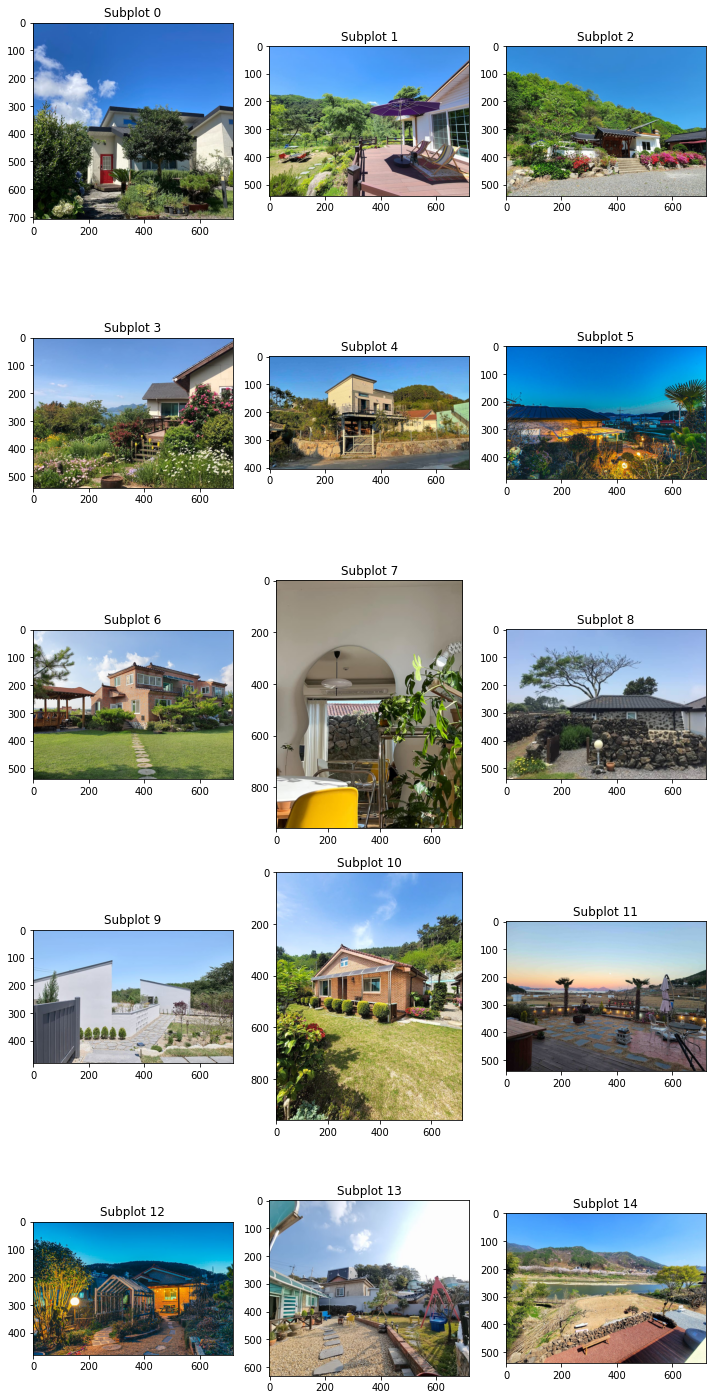

In [39]:
get_similar_image_by_cos(image_index_list_cos_0)

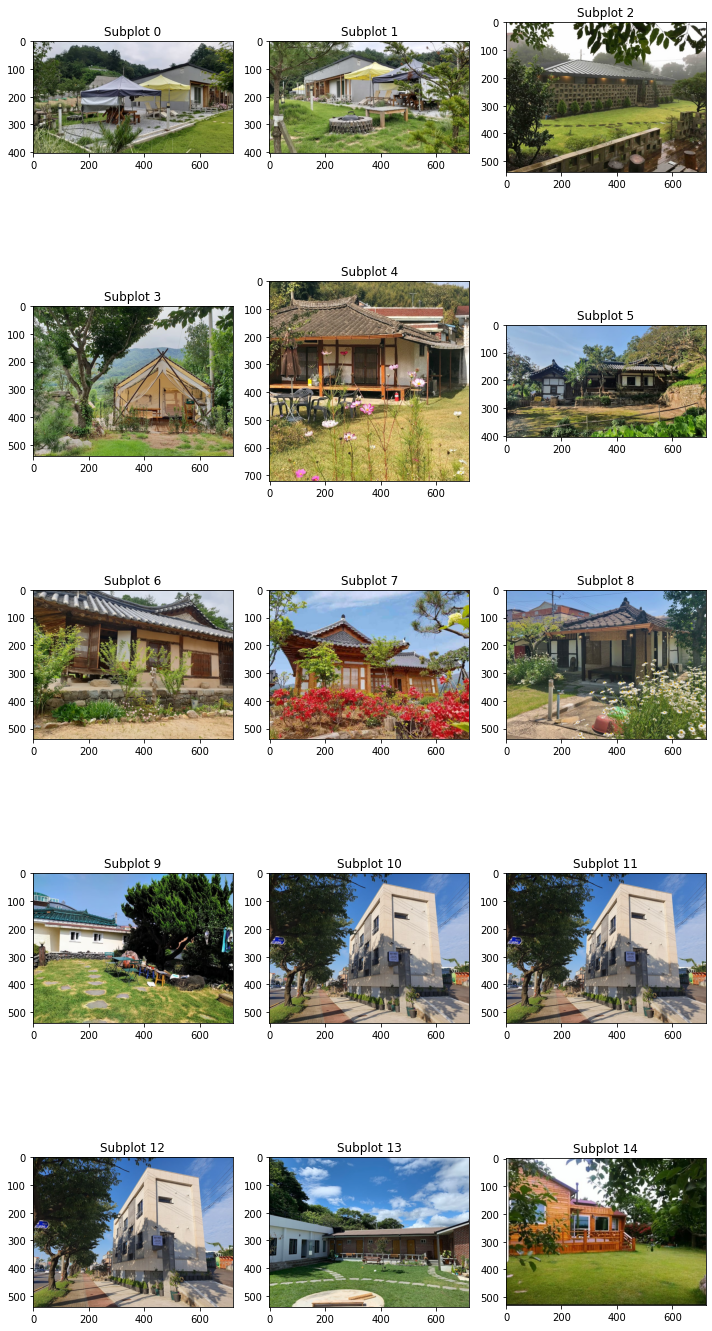

In [16]:
image_index = 1;
image_index_list_cos_1 = list(get_cos_result_by_index(image_index).image_index)
get_similar_image_by_cos(image_index_list_cos_1)

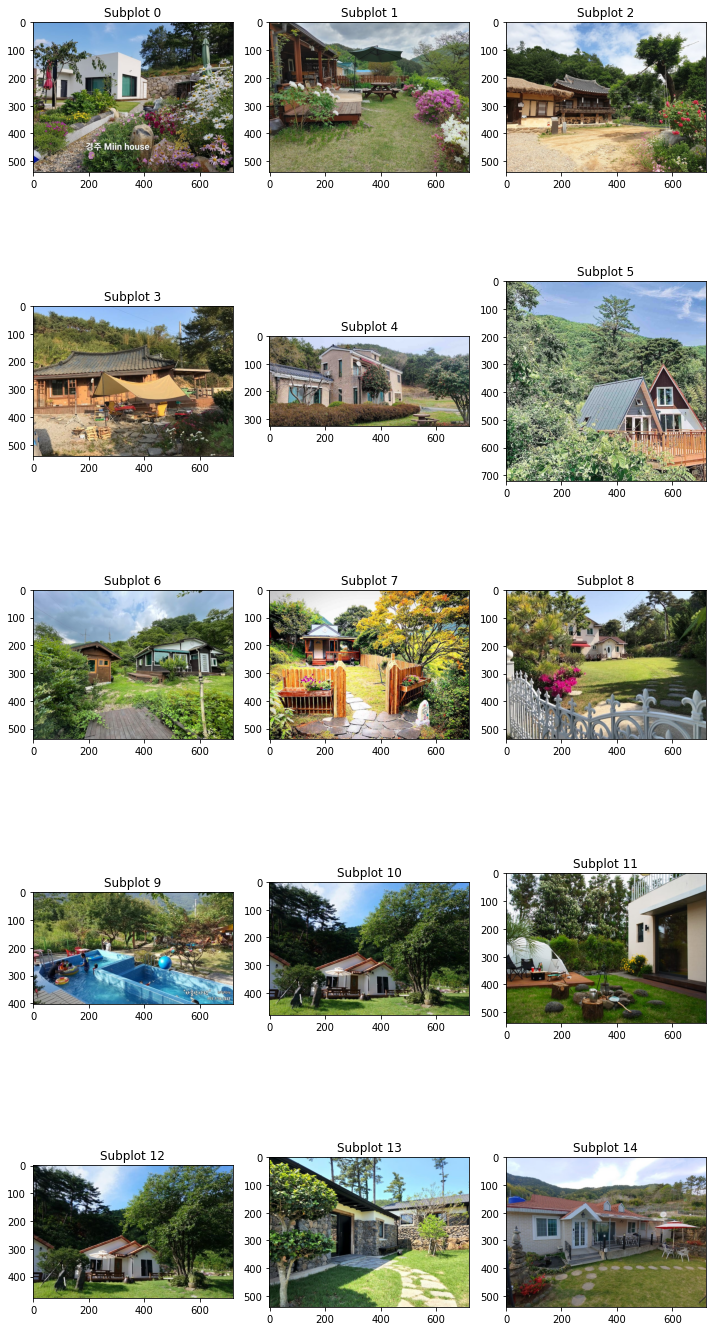

In [17]:
image_index = 2;
image_index_list_cos_2 = list(get_cos_result_by_index(image_index).image_index)
get_similar_image_by_cos(image_index_list_cos_2)

## 머신러닝 기반 유사도 분석

### KNN 사용

In [51]:
knn = NearestNeighbors(n_neighbors=15, p=1)

In [53]:
df_for_knn = df_for_similarity
knn.fit(df_for_knn)

NearestNeighbors(n_neighbors=15, p=1)

In [54]:
similar_index = knn.kneighbors(df_for_knn, return_distance=False)
print(similar_index)

[[   0  710  947 ...  184   94  604]
 [   1  491  240 ...  926   86  789]
 [   2  275  757 ...  476  998  468]
 ...
 [1114  754  414 ...  881 1062  337]
 [1115  128  901 ...  533  279  401]
 [1116  422  684 ... 1100  770  311]]


In [55]:
knn_result = similar_index
print(knn_result)

[[   0  710  947 ...  184   94  604]
 [   1  491  240 ...  926   86  789]
 [   2  275  757 ...  476  998  468]
 ...
 [1114  754  414 ...  881 1062  337]
 [1115  128  901 ...  533  279  401]
 [1116  422  684 ... 1100  770  311]]


In [56]:
def get_knn_result_by_index(img_index):
    df_knn_result = df_merged.loc[knn_result[img_index]]
    return df_knn_result

In [57]:
def get_similar_image_by_knn(img_index_list):
    rows = 5
    cols = 3
    axes = []
    fig = plt.figure(figsize=(10, 20))

    for num, index in enumerate(img_index_list):
        url = df_merged[df_merged['image_index'] == index]['image_url'].values[0]
        axes.append(fig.add_subplot(rows, cols, num + 1))
        subplot_title = "Subplot " + str(num)
        axes[-1].set_title(subplot_title)
        res = requests.get(url)
        request_image = Image.open(BytesIO(res.content))
        plt.imshow(request_image)
    fig.tight_layout()
    plt.show()

In [37]:
image_index = 0;
image_index_list_knn_0 = list(get_knn_result_by_index(image_index).image_index)
print(image_index_list_knn_0)

['gyeongnam_203', 'jeonnam_152', 'gyeongnam_195', 'gyeongnam_93', 'gyeongbuk_235', 'gyeongbuk_60', 'gangwon_30', 'jeonnam_178', 'jeonnam_90', 'gyeongbuk_260', 'jeonnam_31', 'jeju_138', 'jeju_298', 'jeju_60', 'gyeongnam_256']


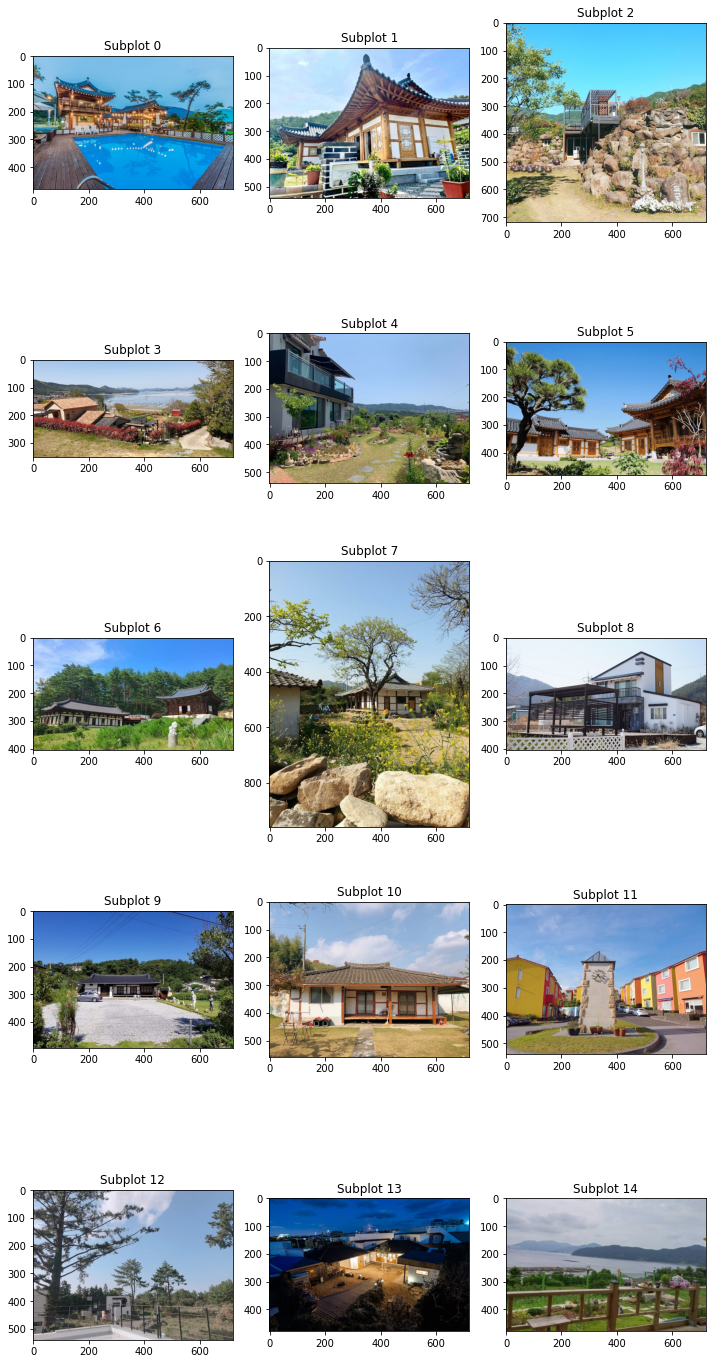

In [38]:
get_similar_image_by_knn(image_index_list_knn_0)

### K-means + cos 유사도

In [58]:
df_for_kmean = df_for_similarity

In [59]:
kmeans_kwargs = {
    "init":"random",
    # "n_clusters":10,
    "n_init":10,
    "max_iter":300,
    "random_state":42
}

In [60]:
sse = []
for k in range(1, 21):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(df_for_kmean)
    sse.append(kmeans.inertia_)

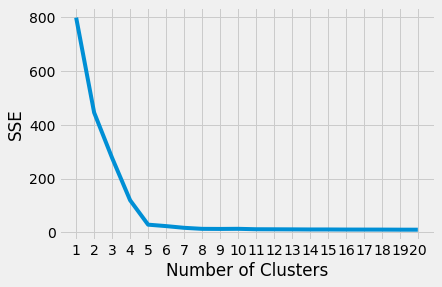

In [61]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 21), sse)
plt.xticks(range(1, 21))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [62]:
kmeans= KMeans(n_clusters=15, **kmeans_kwargs)
kmeans.fit(df_for_kmean)

KMeans(init='random', n_clusters=15, random_state=42)

In [63]:
df_for_kmean['cluster'] = kmeans.fit_predict(df_for_kmean)
df_for_kmean

L2_0      L2_1      L2_2      L2_3      L2_4      L2_5  \
image_index                                                                 
gyeongnam_203  0.139648  0.169798  0.136722  0.108873  0.176598  0.123397   
gyeongbuk_194  0.140625  0.193402  0.150842  0.108315  0.186995  0.132722   
gyeongnam_217  0.141954  0.178325  0.142441  0.102194  0.190987  0.121189   
jeju_102       0.151979  0.173062  0.145052  0.106857  0.177310  0.133428   
jeju_116       0.132614  0.175584  0.139151  0.111856  0.175659  0.150412   
...                 ...       ...       ...       ...       ...       ...   
gyeongnam_232  0.135774  0.180139  0.146762  0.105828  0.186918  0.125276   
gyeongnam_226  0.130606  0.186938  0.146593  0.120030  0.192117  0.121673   
jeju_133       0.138077  0.169712  0.142581  0.103773  0.180805  0.136002   
jeju_127       0.142617  0.171123  0.140616  0.106747  0.173767  0.127077   
gyeongbuk_199  0.130180  0.186989  0.155539  0.121664  0.179350  0.132715   

                   L2_6      L2_7      L2_8      L2_9  ...    L2_126  \
image_index                                            ...             
gyeongnam_203  0.120343  0.245084  0.149954  0.288930  ...  0.305492   
gyeongbuk_194  0.113584  0.244671  0.152429  0.307828  ...  0.322847   
gyeongnam_217  0.114551  0.233060  0.150725  0.302136  ...  0.321539   
jeju_102       0.102689  0.248616  0.144603  0.297525  ...  0.306511   
jeju_116       0.101449  0.255162  0.157335  0.303659  ...  0.333100   
...                 ...       ...       ...       ...  ...       ...   
gyeongnam_232  0.125666  0.242583  0.143527  0.314263  ...  0.323966   
gyeongnam_226  0.114408  0.237203  0.151742  0.305917  ...  0.323678   
jeju_133       0.108735  0.218698  0.163893  0.294224  ...  0.305961   
jeju_127       0.097530  0.251893  0.140797  0.298628  ...  0.304679   
gyeongbuk_199  0.115970  0.228854  0.162364  0.294402  ...  0.312408   

                 L2_127  single  multi  outhouse  apartment  camping  pension  \
image_index                                                                     
gyeongnam_203  0.151653       1      0         0          0        0        0   
gyeongbuk_194  0.149029       1      0         0          0        0        0   
gyeongnam_217  0.152065       0      0         0          0        0        1   
jeju_102       0.142500       0      0         0          1        0        0   
jeju_116       0.142683       0      0         1          0        0        0   
...                 ...     ...    ...       ...        ...      ...      ...   
gyeongnam_232  0.153585       0      0         0          0        0        1   
gyeongnam_226  0.161128       0      0         0          0        0        1   
jeju_133       0.161473       0      0         0          0        0        1   
jeju_127       0.142151       0      0         0          0        0        1   
gyeongbuk_199  0.170806       0      0         0          1        0        0   

               hotel  cluster  
image_index                    
gyeongnam_203      0        6  
gyeongbuk_194      0        6  
gyeongnam_217      0       12  
jeju_102           0        9  
jeju_116           0        1  
...              ...      ...  
gyeongnam_232      0        7  
gyeongnam_226      0       12  
jeju_133           0        4  
jeju_127           0       14  
gyeongbuk_199      0        9  

[1117 rows x 136 columns]

In [96]:
def get_cos_cluster_result_by_index(img_index):
    df_temp = df_for_kmean.loc[df_for_kmean.cluster == df_for_kmean.iloc[img_index].cluster]
    base_row = pd.DataFrame(df_for_kmean.iloc[[img_index]])
    cosine_cluster_result = cosine_similarity(base_row, df_temp)
    df_temp.reset_index(level=0, inplace=True)
    df_cos_result = df_merged.loc[list(np.argsort(cosine_result[img_index])[::-1])[:15]]
    return list(df_temp.loc[list(np.argsort(cosine_cluster_result[0])[::-1])[:15]].image_index)

In [97]:
def get_similar_image_by_cluster(img_index_list):
    rows = 5
    cols = 3
    axes = []
    fig = plt.figure(figsize=(10, 20))

    for num, index in enumerate(img_index_list):
        url = df_merged[df_merged['image_index'] == index]['image_url'].values[0]
        axes.append(fig.add_subplot(rows, cols, num + 1))
        subplot_title = "Subplot " + str(num)
        axes[-1].set_title(subplot_title)
        res = requests.get(url)
        request_image = Image.open(BytesIO(res.content))
        plt.imshow(request_image)
    fig.tight_layout()
    plt.show()

In [103]:
# 561, 168, 392, 630, 1048, 312
image_index = 312
image_index_list_kmeans_0 = get_cos_cluster_result_by_index(image_index)
image_index_list_kmeans_0

['gyeongnam_103',
 'jeonnam_31',
 'gyeongbuk_134',
 'gyeongbuk_107',
 'gangwon_45',
 'jeju_60',
 'gyeongbuk_194',
 'jeonnam_296',
 'jeju_160',
 'jeonnam_178',
 'jeju_286',
 'gyeongnam_186',
 'gyeongbuk_162',
 'jeju_55',
 'jeju_24']

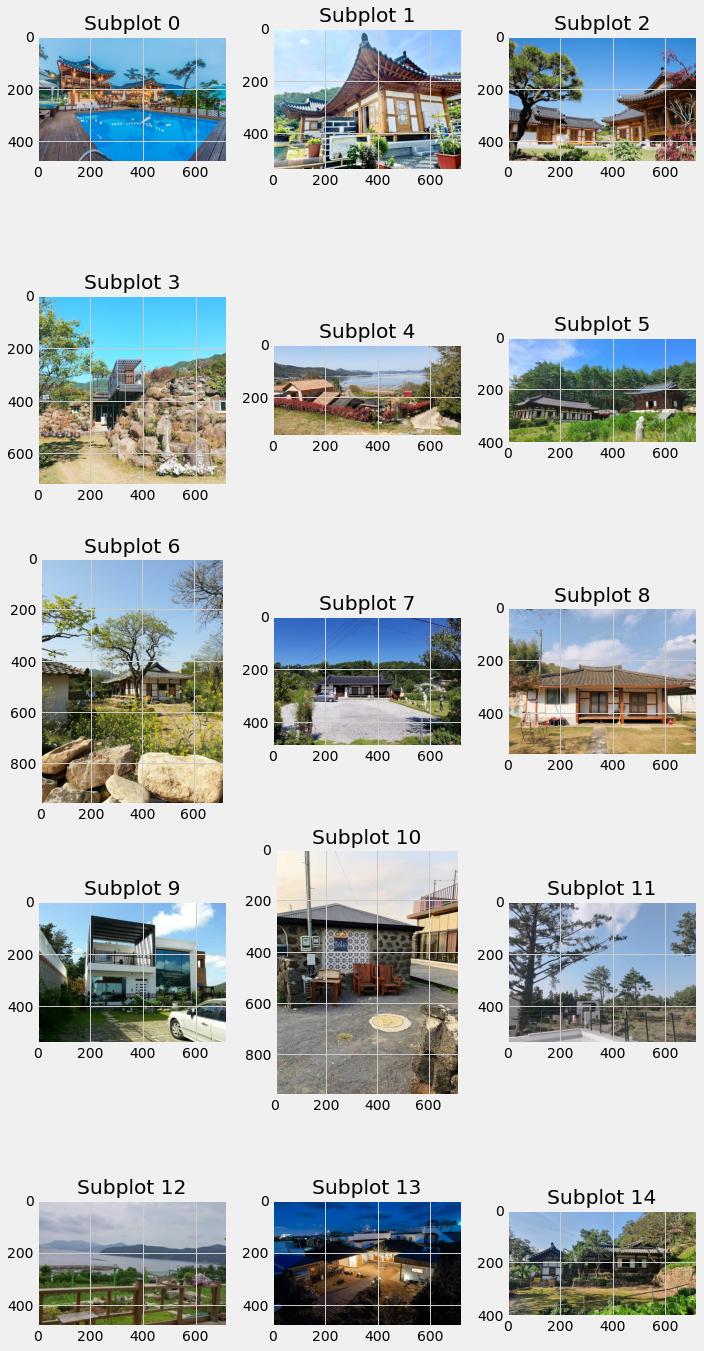

In [113]:
image_index = 0;
image_index_list_kmeans_0 = get_cos_cluster_result_by_index(image_index)
get_similar_image_by_cluster(image_index_list_kmeans_0)